## Linear Regression 

In [58]:
# R**2 = TSS-RSS/TSS   Tahmin katsayılarımızın  ne kadar  doğru 
#sonuç verdiğini yani çizdiğimiz regresyon doğrusunun gerçek dataya ne kadar iyi uyduğunu R**2 ile ölçeriz

In [59]:
# 1 --> Önce Datayı ham olarak  inceleyelim 
# 2 --> Datayı import edelim 
# 3 --> Datayı inceleyelim (head,describe,info)
# 4  --> Datayı görselleştir
# 5 --> Modeli oluştur (Formüller)
# 6 -->  Hazırlık
# 7 --> Train -Test split
# 8 --> Lineer regresyon modelini Çalıştır (Fit)
# 9 --> Katsayıları  Hesaplama 
# 10 --> tahmin yap (predict)
# 11 -->Gerçek Data ve Tahmin Datasını çiz
# 12 --> Hataları Çiz
# 13 --> Model Doğruluğunu kontrol et(RMSE ve R**2)
# 14 -->Yorumlar

In [97]:
#Paket import
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
#Datafreme'i oluştur
df = pd.read_csv("Advertising.csv",index_col=0)

## 3 - Datayı İnceleyelim 

In [62]:
df.head(10)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [99]:
df.tail() # Son 5 Satır

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [101]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## 4 - Datayı Görselleştir

In [66]:
data = df[["TV","sales"]]
X = data["TV"]        # input --> feature
y = data["sales"]     #output

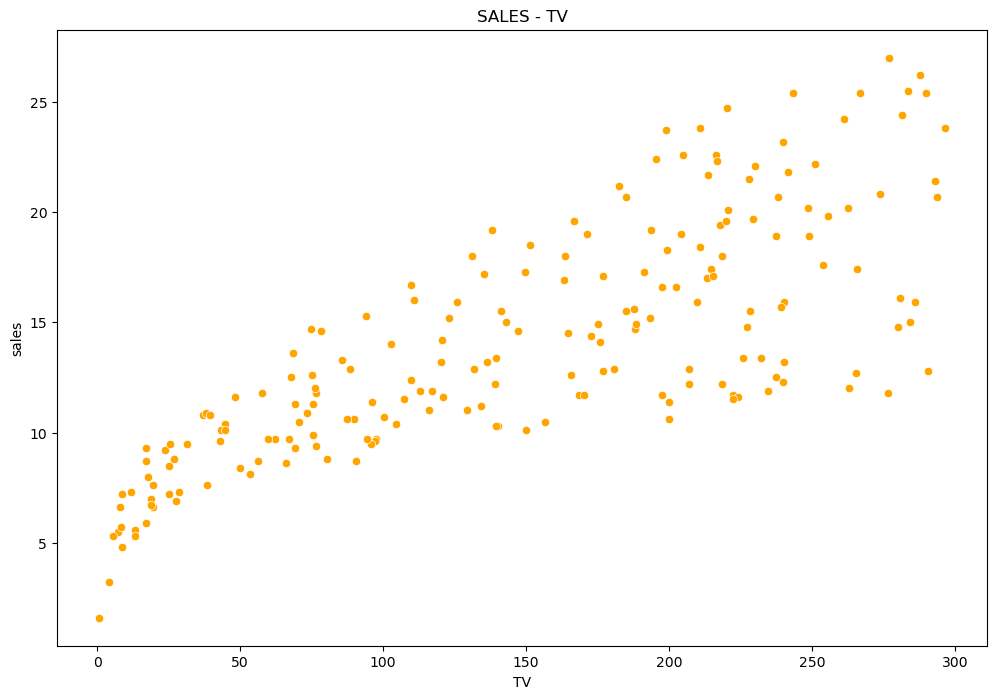

In [102]:
#Grafik Çiz
plt.figure(figsize=(12,8))
sns.scatterplot(data=data,x="TV",y="sales",color="orange")
plt.title("SALES - TV")
plt.show()

In [104]:
from sklearn.linear_model import LinearRegression

In [106]:
#Linear Regresyon nesnelerini yönet
lr = LinearRegression()

In [70]:
#input ve outputun boyutuna bakalım 
print("X'in boyutu",X.shape)
print("Y'nin boyutu",y.shape)

X'in boyutu (200,)
Y'nin boyutu (200,)


In [71]:
#Yeniden boyutlandırmamız lazım
X = X.values.reshape(-1,1) #Baştaki Boyutunu kabul et ve en son yanına bir sutun ekle

In [73]:
X.shape

(200, 1)

In [74]:
y = y.values.reshape(-1,1)

In [75]:
y.shape

(200, 1)

## Train - Test Split


In [77]:
from sklearn.model_selection import train_test_split

Train Data : X_train ,y_train
Test Data : X_test,y_test

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=100)

In [82]:
print("X_train boyutu",X_train.shape)
print("y_train boyutu",X_train.shape)

print("X_test boyutu",X_test.shape)
print("y_test boyutu",y_test.shape)


X_train boyutu (140, 1)
y_train boyutu (140, 1)
X_test boyutu (60, 1)
y_test boyutu (60, 1)


## Linear Regression Modelini Çalıştır(Fit)

In [83]:
# regresyonu çalıştır --> fit
# fit --> öğrenme
# train data üzerinden

In [107]:
lr.fit(X_train,y_train) #y=β0+β1X

LinearRegression()

## Katsayıları Hesaplama(intercept_,coef_)

In [85]:
#intercept --> beta(β)0
print("intercept:",lr.intercept_)

intercept: [6.98966586]


In [87]:
#slope = coefficient --> beta(β)1
print("slope(coefficient) eğim :",lr.coef_)

slope(coefficient) eğim : [[0.04649736]]


 y = 6.989 + 0.0464X

## 10 - Tahmin  Yapmak (Predict)

In [89]:
#Tahmin Yap 
y_pred = lr.predict(X_test)


In [90]:
y_pred

array([[ 7.35234526],
       [18.06533671],
       [13.27610876],
       [17.11214086],
       [18.22807747],
       [16.60531965],
       [13.4620982 ],
       [16.17754395],
       [17.05169429],
       [17.07029323],
       [12.4391563 ],
       [17.66080969],
       [ 9.60281742],
       [15.72186983],
       [11.04423554],
       [11.36971705],
       [13.95032046],
       [14.90351632],
       [14.59198401],
       [12.23921766],
       [16.97264878],
       [13.00642408],
       [16.07524976],
       [15.21969836],
       [15.58702749],
       [17.23303399],
       [17.20978531],
       [10.49091697],
       [15.58702749],
       [12.71349072],
       [10.1700852 ],
       [10.19798361],
       [12.61584627],
       [15.74976825],
       [ 9.31453379],
       [12.59259759],
       [11.50920913],
       [14.81982107],
       [17.33067844],
       [15.97295557],
       [17.00519693],
       [15.15925179],
       [14.63848137],
       [17.14933874],
       [12.57864838],
       [11

In [91]:
len(y_pred)

60

## Gerçek Data ve Tahmin Datasını Çiz

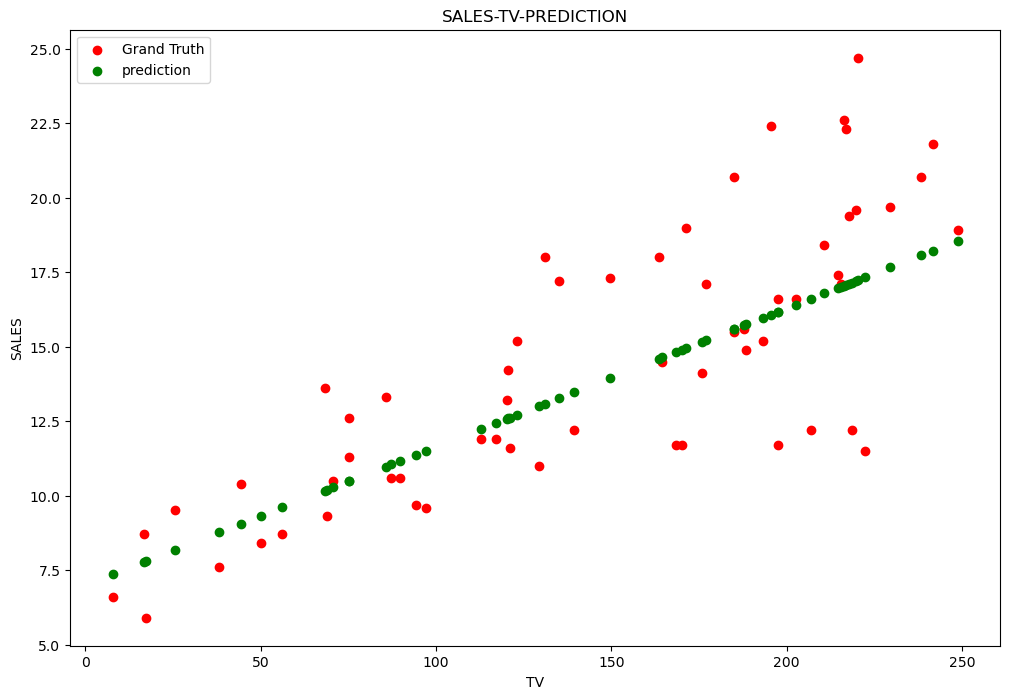

In [95]:
#Gerçek Data --> Grand Truth 
fig,ax = plt.subplots(figsize=(12,8)) # Bir Grafik üzerine birden fazla grafik çizilecekse subplots kullanılır
ax.scatter(X_test,y_test,label="Grand Truth",color="red")
#Tahmin --> predictiom
ax.scatter(X_test,y_pred,label="prediction",color="green")

plt.title("SALES-TV-PREDICTION")
plt.xlabel("TV")
plt.ylabel("SALES")
plt.legend(loc="upper left")
plt.show()


In [109]:
#İlk 10 gerçek y değerini görelim 
y_test[0:10]

array([[ 6.6],
       [20.7],
       [17.2],
       [19.4],
       [21.8],
       [12.2],
       [12.2],
       [11.7],
       [22.6],
       [22.3]])

In [110]:
#İlk 10 Tahmin değerini görelim 
y_pred[0:10]

array([[ 7.35234526],
       [18.06533671],
       [13.27610876],
       [17.11214086],
       [18.22807747],
       [16.60531965],
       [13.4620982 ],
       [16.17754395],
       [17.05169429],
       [17.07029323]])

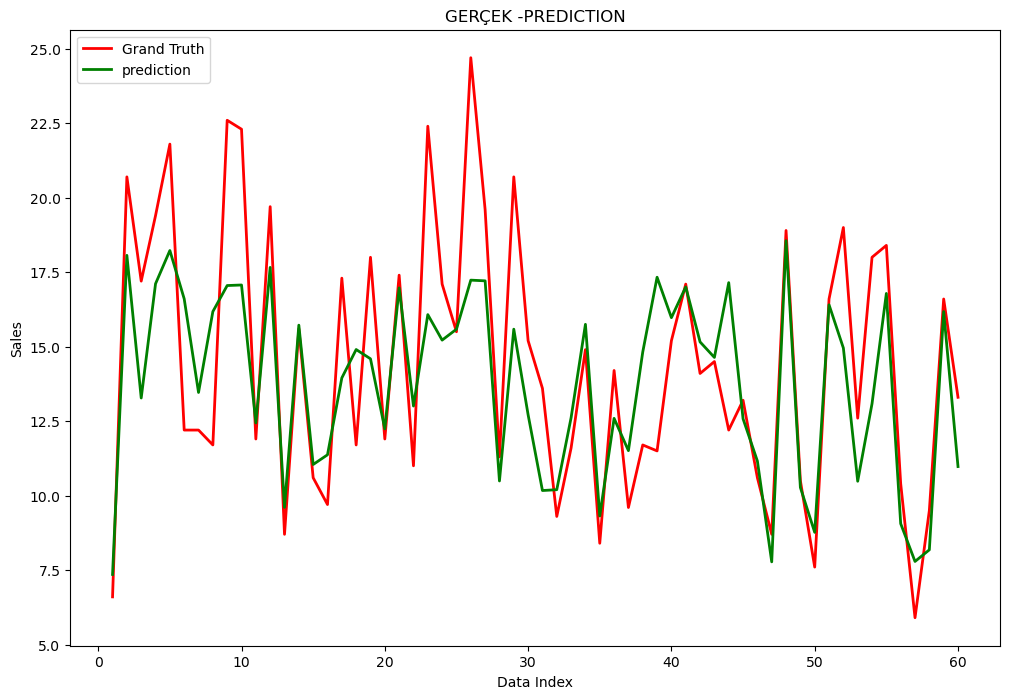

In [112]:
#Her bir tahmin noktasınaki değişimi görelim
indexler = range(1,61)




#Gerçek Data --> Grand Truth
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(indexler,y_test,label="Grand Truth",color="red",linewidth = 2)

#Tahmin  --> Prediction
ax.plot(indexler,y_pred,label="prediction",color="green",linewidth = 2)


plt.title("GERÇEK -PREDICTION")
plt.xlabel("Data Index")
plt.ylabel("Sales")
plt.legend(loc="upper left")
plt.show()

## Hataları Çiz

In [113]:
import numpy as np

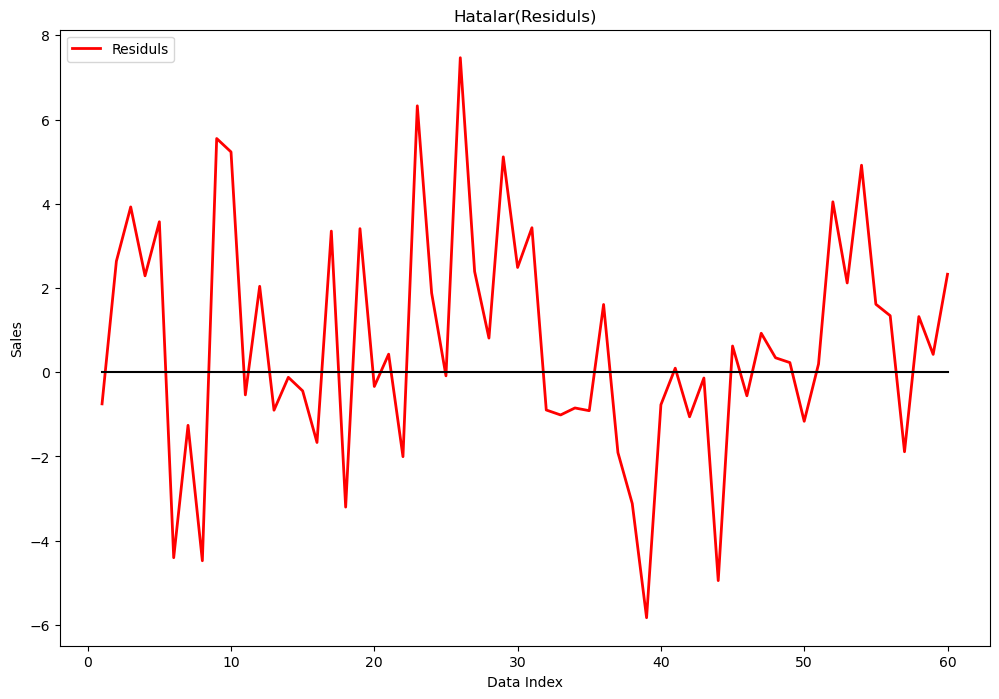

In [117]:
#Her bir tahmin noktasındaki hatayı görelim
indexler = range(1,61)
#Residuls --> Hatalar
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(indexler,y_test-y_pred,label="Residuls",color="red",linewidth = 2)

#Sıfır Doğrusunu Çiz
ax.plot(indexler,np.zeros(60),color="black")

plt.title("Hatalar(Residuls)")
plt.xlabel("Data Index")
plt.ylabel("Sales")
plt.legend(loc="upper left")
plt.show()


##  13 -  Model doğruluğunu kontrol et (RMSE, ve R**2)

In [118]:
#mean_squared_error(y_true,y_pred)
#r2_score(y_true,y_pred)

RMSE : Root Mean Squared Error
R**2 : Coefficient of determination

In [119]:
#sklearn import
from sklearn.metrics import r2_score,mean_squared_error

In [122]:
#R^2 hesaplayalım
r2_ = r2_score(y_test,y_pred)

In [124]:
#R^2 Yazdır
print("R^2 %  :",r2_*100)

R^2 %  : 59.42987267783302


In [134]:
#MSE(Bütün Hataların karelerinin toplamının ortalaması ) ---> RMSE
mse = mean_squared_error(y_test,y_pred)

In [135]:
#MSE Yazdır
print("MSE:",mse)

MSE: 7.975798532854851


In [136]:
#RMSE
import math
rmse = math.sqrt(mse)

In [137]:
#RMSE yazdır
print("RMSE :",rmse)

RMSE : 2.8241456288327007
